In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
df=pd.read_csv('LBW_Dataset.csv')

In [117]:
def plotdist(var):
    unique = var.nunique()
    plt.figure(figsize = [10,6])
    sns.distplot(var, bins = unique, hist=True, kde=False, color='blue')
    plt.show()

In [118]:
def plotbox(var):
    sns.boxplot(x=var)

In [119]:
def clean_median(var):
    var.fillna(var.median(), inplace = True)

In [120]:
def clean_mode(var):
    var.fillna(var.mode()[0], inplace = True)

In [121]:
outliers=[]
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [122]:
df.head()

,Community,Age,Weight,Delivery phase,HB,IFA,BP,Education,Residence,Result
0,1,21.0,42.0,1.0,9.2,1,1.375,5.0,1.0,0
1,1,21.0,NaN,1.0,8.8,1,1.500,5.0,1.0,0
2,1,21.0,NaN,1.0,9.2,1,2.125,5.0,1.0,0
3,1,21.0,NaN,1.0,8.0,1,1.375,5.0,1.0,0
4,1,24.0,33.0,1.0,9.3,1,1.571,5.0,1.0,0


In [123]:
df.count()

Community         96
Age               89
Weight            85
Delivery phase    92
HB                77
IFA               96
BP                81
Education         93
Residence         94
Result            96
dtype: int64

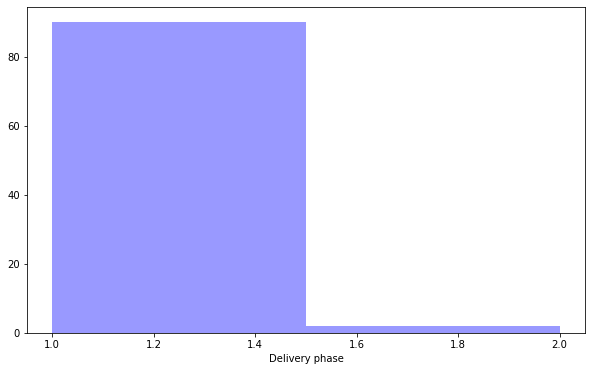

In [124]:
#plotdist(df['Age'])
#plotdist(df['Weight'])
#plotdist(df['HB'])
#plotdist(df['Residence'])
#plotdist(df['Education'])
plotdist(df['Delivery phase'])

In [125]:
clean_median(df['Age'])
clean_median(df['Weight'])
clean_median(df['HB'])
clean_mode(df['Residence'])
clean_mode(df['Education'])
clean_mode(df['Delivery phase'])

In [126]:
df.count()

Community         96
Age               96
Weight            96
Delivery phase    96
HB                96
IFA               96
BP                81
Education         96
Residence         96
Result            96
dtype: int64

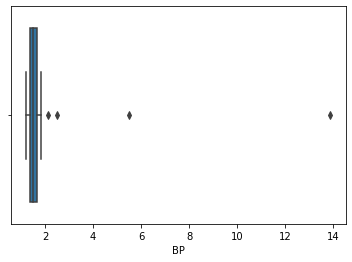

In [127]:
plotbox(df['BP'])

In [128]:
outlier_datapoints = detect_outlier(df['BP'])
outlier_datapoints

[13.875]

In [129]:
a = df[df['BP'] == outlier_datapoints[0]].index.values

In [130]:
a[0]

64

In [131]:
df['BP'][a[0]] = df['BP'].median()

<ipython-input-131-d11bddbf6084>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BP'][a[0]] = df['BP'].median()


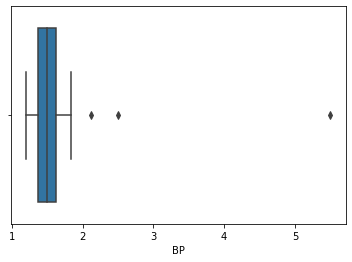

In [132]:
plotbox(df['BP'])

In [133]:
outlier_datapoints = detect_outlier(df['BP'])
outlier_datapoints

[13.875, 5.5]

In [134]:
a = df[df['BP'] == outlier_datapoints[1]].index.values

In [135]:
df['BP'][a[0]] = df['BP'].median()

<ipython-input-135-d11bddbf6084>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BP'][a[0]] = df['BP'].median()


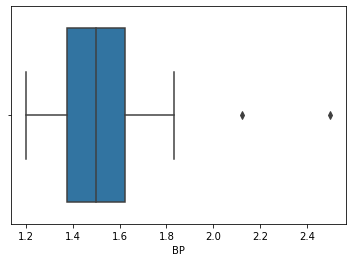

In [136]:
plotbox(df['BP'])

In [137]:
outlier_datapoints = detect_outlier(df['BP'])
outlier_datapoints

[13.875, 5.5, 2.125, 2.5]

In [138]:
a = df[df['BP'] == outlier_datapoints[2]].index.values
df['BP'][a[0]] = df['BP'].median()

<ipython-input-138-f2cf3c089c6b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BP'][a[0]] = df['BP'].median()


In [139]:
a = df[df['BP'] == outlier_datapoints[3]].index.values
df['BP'][a[0]] = df['BP'].median()

<ipython-input-139-25a498d5afd1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BP'][a[0]] = df['BP'].median()


In [140]:
clean_median(df['BP'])

In [141]:
df.count()

Community         96
Age               96
Weight            96
Delivery phase    96
HB                96
IFA               96
BP                96
Education         96
Residence         96
Result            96
dtype: int64

In [142]:
df = df.drop(['Delivery phase'],axis=1)
df = df.drop(['Education'],axis=1)

In [143]:
df.head()

,Community,Age,Weight,HB,IFA,BP,Residence,Result
0,1,21.0,42.0,9.2,1,1.375,1.0,0
1,1,21.0,43.0,8.8,1,1.500,1.0,0
2,1,21.0,43.0,9.2,1,1.500,1.0,0
3,1,21.0,43.0,8.0,1,1.375,1.0,0
4,1,24.0,33.0,9.3,1,1.571,1.0,0


In [153]:
new_df = df

In [154]:
new_df.to_csv('cleaned1.csv')

In [146]:
df.head

<bound method NDFrame.head of     Community   Age  Weight   HB  IFA     BP  Residence  Result
0           1  21.0    42.0  9.2    1  1.375        1.0       0
1           1  21.0    43.0  8.8    1  1.500        1.0       0
2           1  21.0    43.0  9.2    1  1.500        1.0       0
3           1  21.0    43.0  8.0    1  1.375        1.0       0
4           1  24.0    33.0  9.3    1  1.571        1.0       0
..        ...   ...     ...  ...  ...    ...        ...     ...
91          3  21.0    55.0  9.0    0  1.375        1.0       1
92          3  24.0    39.0  8.4    0  1.500        1.0       1
93          3  24.0    50.0  9.0    0  1.375        1.0       1
94          1  24.0    38.0  9.0    0  1.500        1.0       1
95          3  21.0    50.0  9.0    1  1.375        1.0       1

[96 rows x 8 columns]>

In [147]:
zeros=[]
for i in list(df['Result']):
    if i==0:
        zeros.append(i)
print(len(zeros))

24


In [151]:
is_zero=df["Result"]==0
duplicate_row=df[is_zero]
df=df.append(duplicate_row*3)
df.head

<bound method NDFrame.head of     Community    Age  Weight    HB  IFA         BP  Residence  Result
0           1   21.0    42.0   9.2    1   1.375000        1.0       0
1           1   21.0    43.0   8.8    1   1.500000        1.0       0
2           1   21.0    43.0   9.2    1   1.500000        1.0       0
3           1   21.0    43.0   8.0    1   1.375000        1.0       0
4           1   24.0    33.0   9.3    1   1.571000        1.0       0
..        ...    ...     ...   ...  ...        ...        ...     ...
19          9  216.0   387.0  86.4    0  10.800000        9.0       0
20         27  234.0   387.0  81.0    0  13.500000        9.0       0
21          9  243.0   387.0  72.0    9  14.142857        9.0       0
22          9  189.0   387.0  84.6    9  13.500000        9.0       0
23         36  216.0   387.0  81.0    0  14.953846        9.0       0

[168 rows x 8 columns]>

In [152]:
zeros=[]
for i in list(df['Result']):
    if i==0:
        zeros.append(i)
print(len(zeros))

96


In [150]:
df

,Community,Age,Weight,HB,IFA,BP,Residence,Result
0,1,21.0,42.0,9.2,1,1.375000,1.0,0
1,1,21.0,43.0,8.8,1,1.500000,1.0,0
2,1,21.0,43.0,9.2,1,1.500000,1.0,0
3,1,21.0,43.0,8.0,1,1.375000,1.0,0
4,1,24.0,33.0,9.3,1,1.571000,1.0,0
...,...,...,...,...,...,...,...,...
19,3,72.0,129.0,28.8,0,3.600000,3.0,0
20,9,78.0,129.0,27.0,0,4.500000,3.0,0
21,3,81.0,129.0,24.0,3,4.714286,3.0,0
22,3,63.0,129.0,28.2,3,4.500000,3.0,0
